In [2]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t 
import seaborn as sns
import matplotlib.patches  as patches
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower
from collections import namedtuple
sns.set_style('whitegrid')
random.seed(30)
np.random.seed(30)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (12.5, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Type I and Type II errors:

__Type I error__ is concluding that there is a significant difference between Treatment and Control when there is no real difference.<br>
OR<
is the rejection of a true null hypothesis (false positive).

Type II error is concluding that there is no significant difference between Treatment and Control when there actually is a difference.<br> 
OR
is the non-rejection of false null hypothesis (false negative).'

__Power__: Is the probability of detecting a difference between the groups (rejecting the null hypothesis) when there really is a difference. 

Power = Pr(reject H0 | H1 is true) = 1 - Pr(fail to reject H0 | H0 is false)

The rate of the type II error is denoted by β (beta) and related to the power of a test, which equals 1−β.


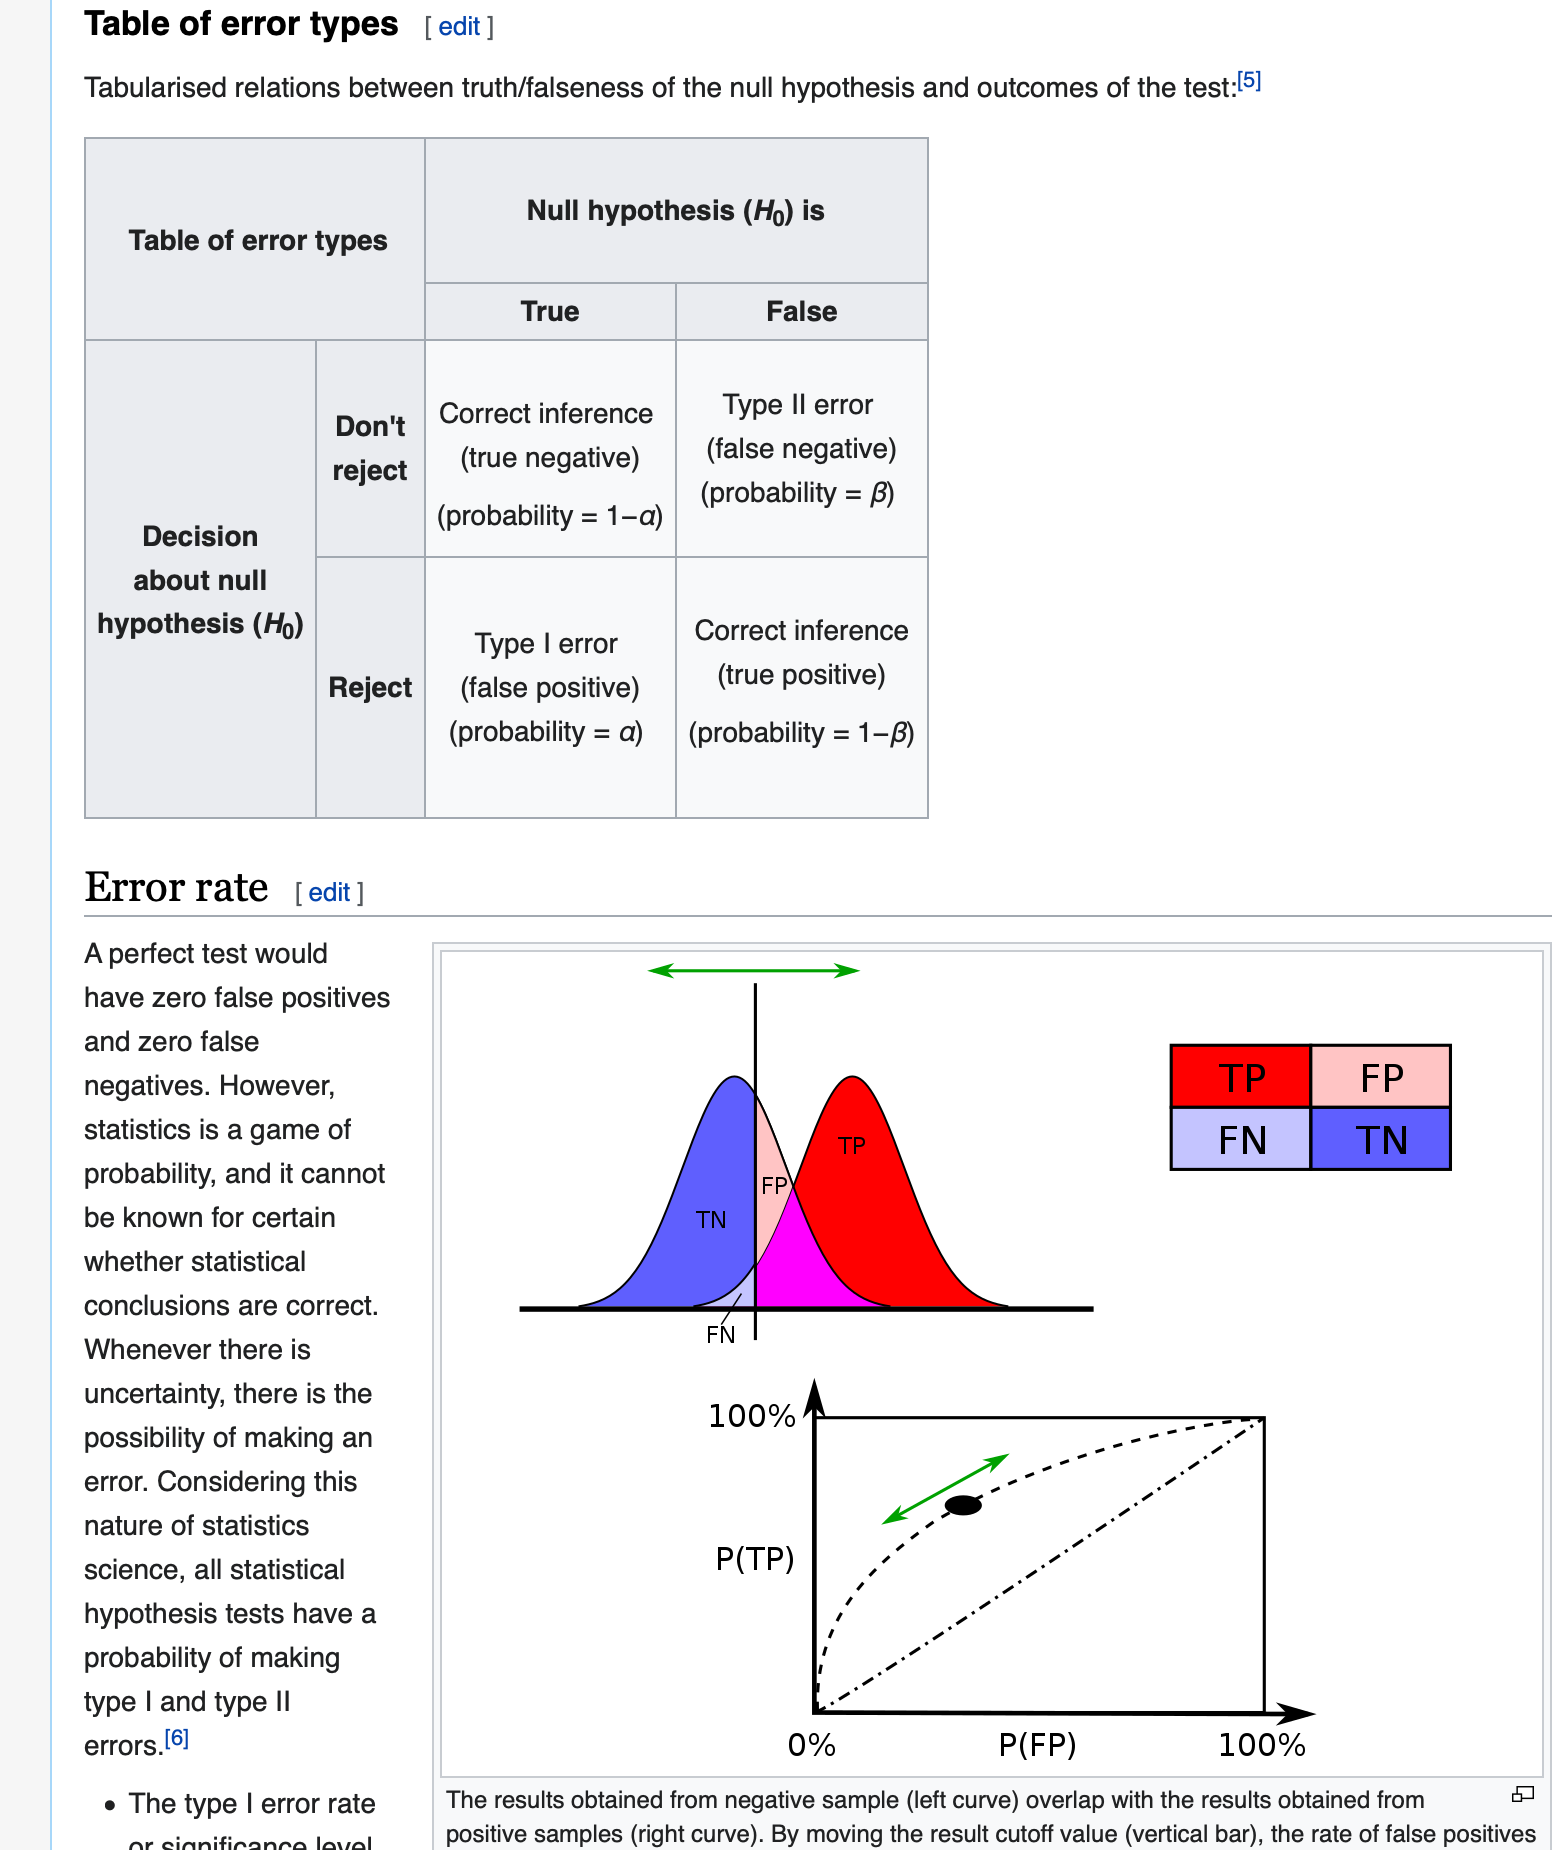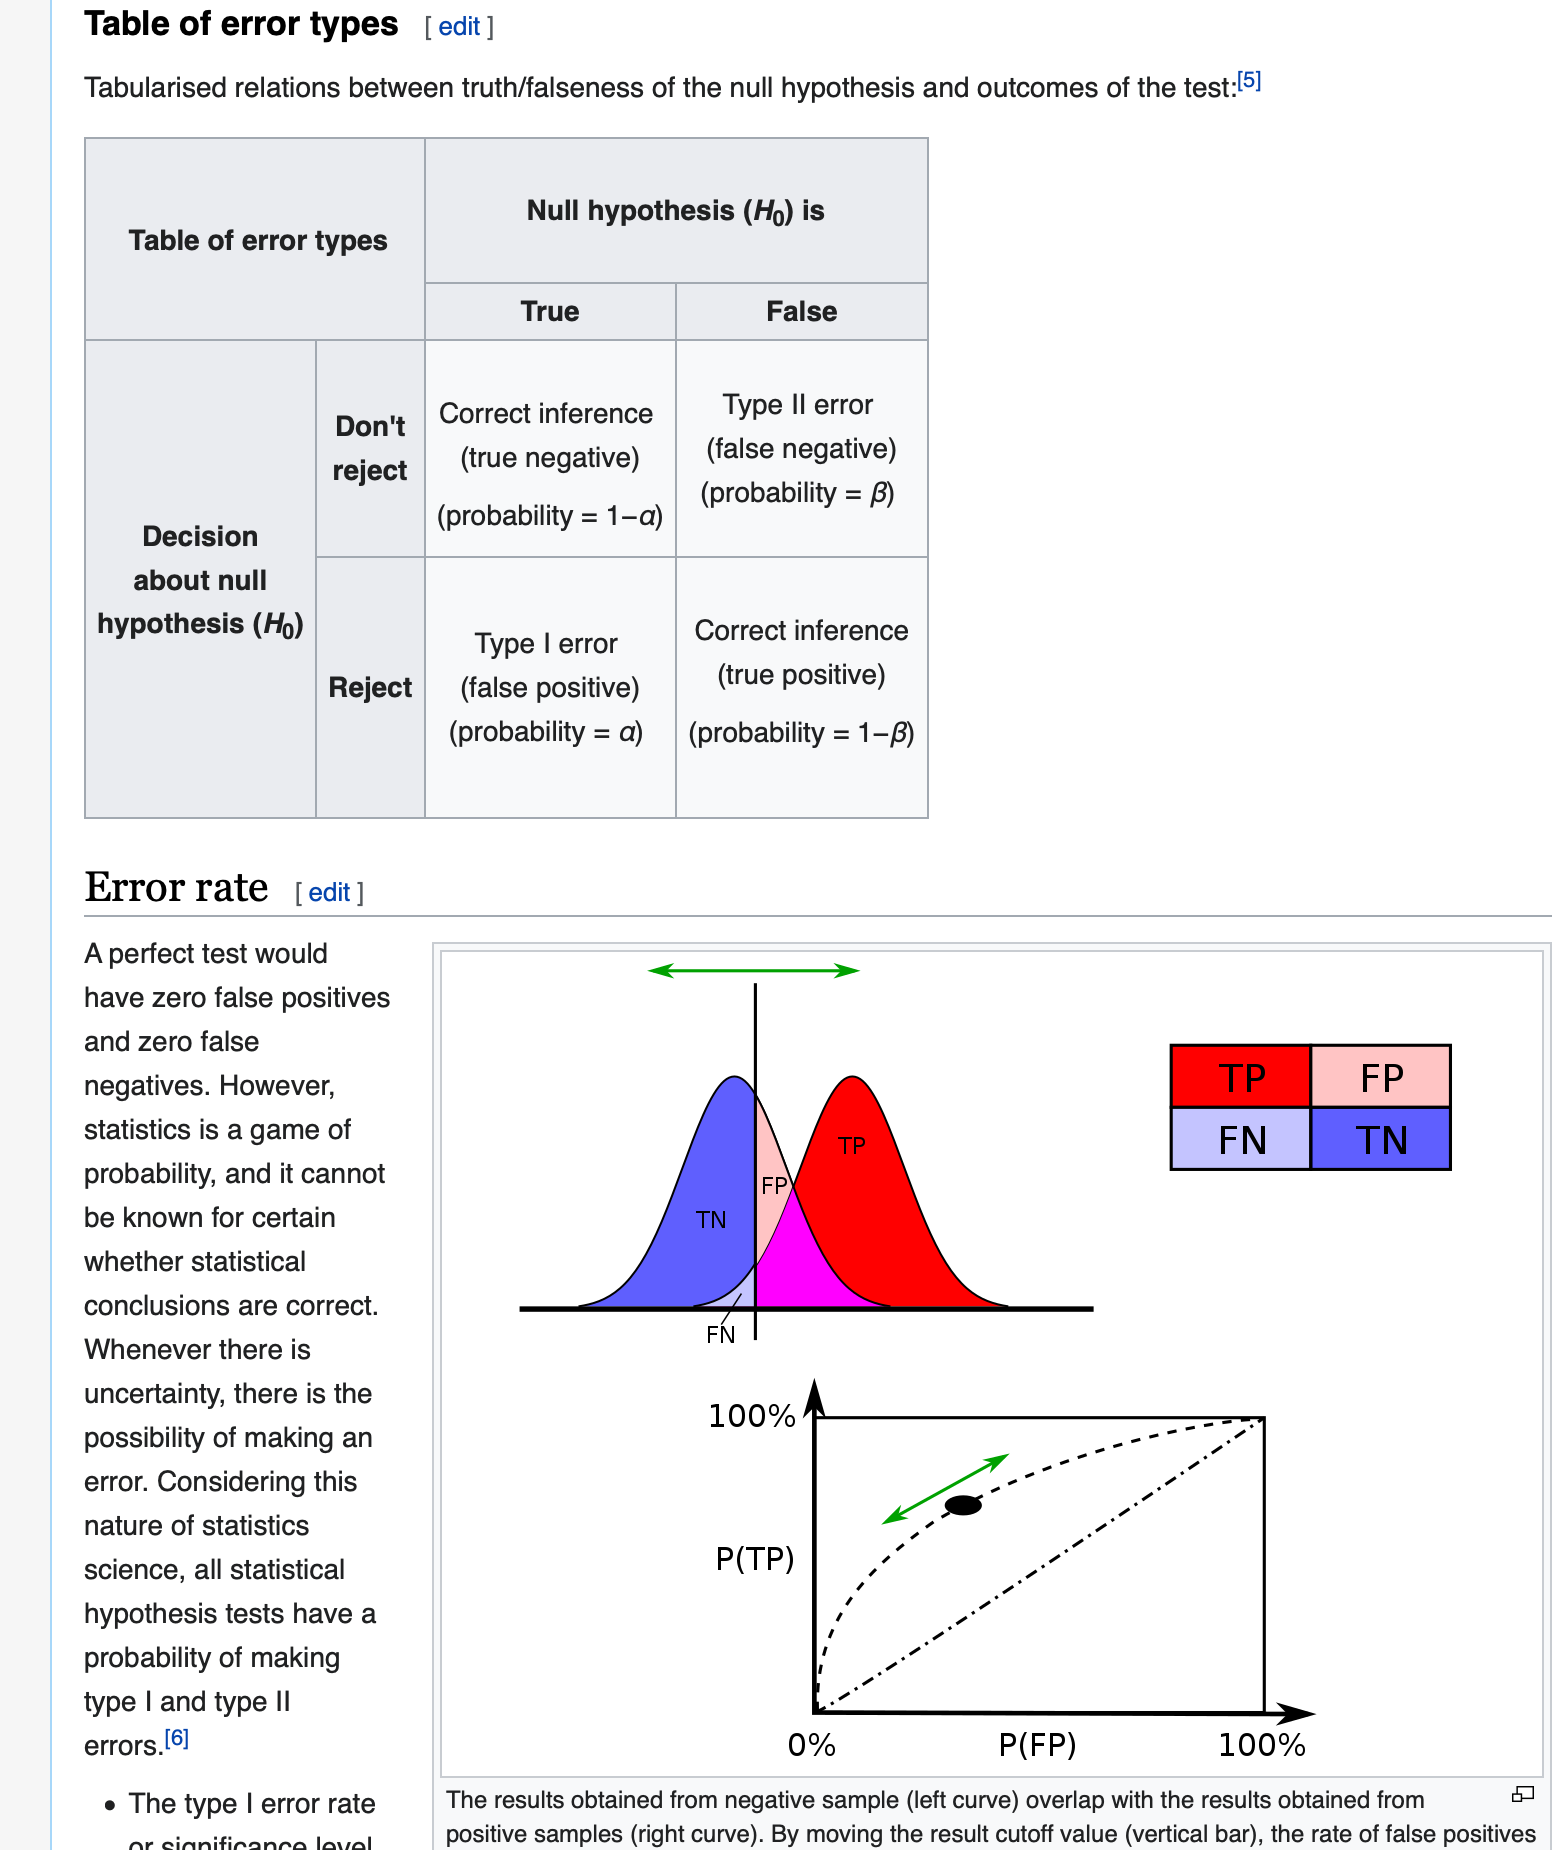

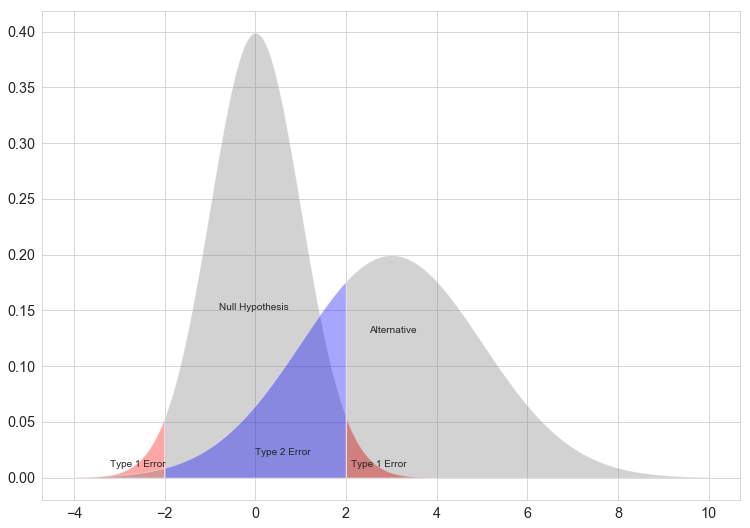

In [3]:
plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

## Effect Size

__Effect size__: Is the quantified magnitude of the difference present. For example, difference in the means between Control and Treatment. 

NameError: name 'normal_dist' is not defined

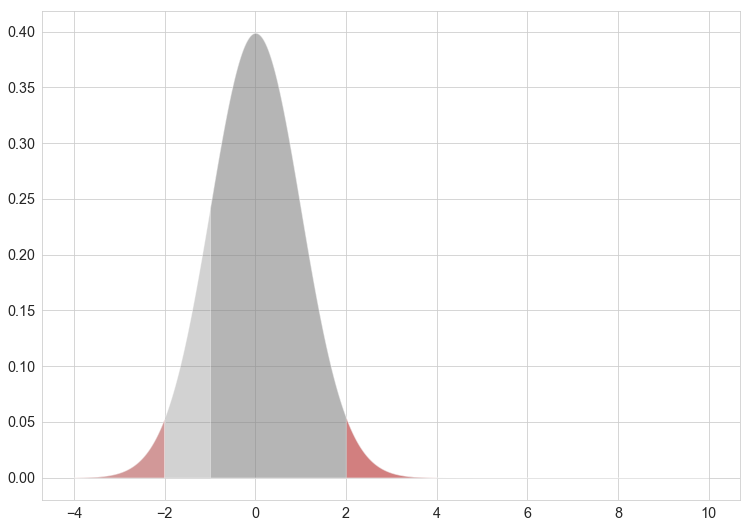

In [4]:
plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,10,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,10,0.01)),
                 facecolor='grey',
                 alpha=0.35)

d = 2
std =1

plt.fill_between(x=np.arange(-2,8,0.01), 
                 y1= normal_dist(np.arange(-2,8,0.01),d,std) ,
                 facecolor='grey',
               )

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

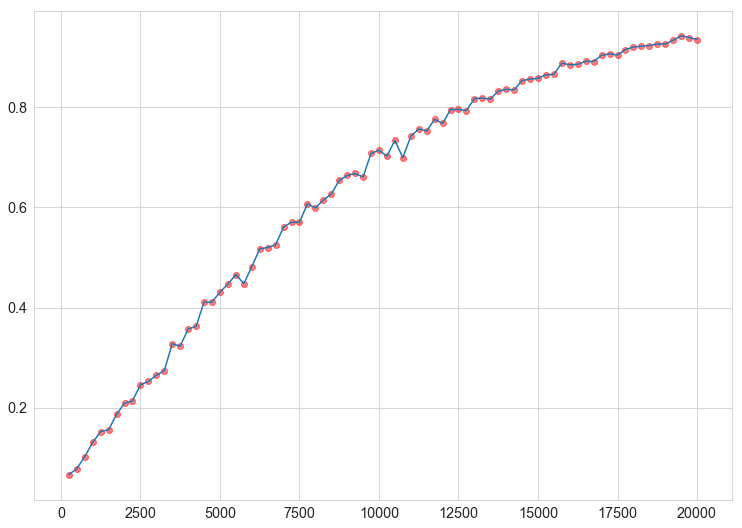

In [5]:
import numpy as np

from scipy.stats import norm, binom
from statsmodels.stats.weightstats import ttest_ind

# Sample data would be actual data measured over a fixed period of time prior to our 
# experiment. For illustration purposes here we have generated data from a normal 
# distribution.
sample_mean = 21.50
sample_sd = 12.91
sample_data = norm.rvs(loc=sample_mean, scale=sample_sd, size=20000)

sample_sizes = range(250, 20000 + 1, 250) # Sample sizes we will test over
alpha = 0.05 # Our fixed alpha
sims = 2000 # The number of simulations we will run per sample size
# The minimum relative effect we will test for (3%). We could try multiple relative
# effect is we are not sure what our minimum relative effect should be
relative_effect = 1.03 
alternative = "two-sided" # Is the alternative one-sided or two-sided 

power_dist = np.empty((len(sample_sizes), 2))
for i in range(0, len(sample_sizes)): 
    N = sample_sizes[i]
    
    control_data = sample_data[0:N]
    # Multiply the control data by the relative effect, this will shift the distribution
    # of the variant left or right depending on the direction of the relative effect
    variant_data = control_data * relative_effect 
    
    significance_results = []
    for j in range(0, sims):
        # Randomly allocate the sample data to the control and variant
        rv = binom.rvs(1, 0.5, size=N) 
        control_sample = control_data[rv == True] 
        variant_sample = variant_data[rv == False]
        
        # Use Welch's t-test, make no assumptions on tests for equal variances
        test_result = ttest_ind(control_sample, variant_sample, 
                                alternative=alternative, usevar='unequal') 
        # Test for significance
        significance_results.append(test_result[1] <= alpha) 
    # The power is the number of times we have a significant result 
    # as we are assuming the alternative hypothesis is true
    power_dist[i,] = [N, np.mean(significance_results)] 

plt.plot(power_dist[:,0], power_dist[:,1])
plt.scatter(power_dist[:,0], power_dist[:,1], c='r', alpha=0.5)

In [3]:
#phacking
# https://www.textbook.ds100.org/ch/18/hyp_phacking.html
# https://medium.com/@pdquant/stocks-significance-testing-p-hacking-how-volatile-is-volatile-1a0da3064b8a
n = 50

reps = 1000
num_pages = 15
# This will represent percentage of users that make a paid account from the landing page
# Note that all pages have no effect, so they all just have a base 10% of interactions.
landing_pages = [np.random.normal(0.1, 0.01, n) for _ in range(num_pages)]

# This will be our "control"
A = landing_pages[0]

# Our test statistic will be the difference between the mean percentage 
def test_stat(A, B):
    return np.abs(np.mean(B) - np.mean(A))

p_vals = []
for i in range(1, num_pages):
    # We test against each of the non-control landing pages
    B = landing_pages[i]
    p_val = permutedpvalue(A, B)
    p_vals.append(p_val)
print(p_vals)

sns.distplot(p_vals, bins=8, kde=False)
plt.xlim((0,1))
plt.show()


NameError: name 'permutedpvalue' is not defined

# References: 

https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.301.2735&rep=rep1&type=pdf